# **Using pandas read_html to Web Scrape Data for Data Science** 

We will be scraping data using pandas read_html() function for our data science project. We will be web scraping NBA player stats data and perform a quick data exploration.

## **URL to the webpage "2018-19 NBA Player Stats: Per Game"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [2]:
# The Building Blocks
year = '2020'
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = url_link.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

Similarly, we can return a list of URL given a list of years (e.g. 2015,2016,2017,2018,2019).

In [3]:
years = [2015,2016,2017,2018,2019]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = url_link.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


### Method 2

We can directly fed the url

In [4]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

## **Read HTML webpage into pandas**

In [5]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [6]:
df = pd.read_html(url, header = 0)
df

[      Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
 0      1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
 1      2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
 2      3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
 3      4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
 4      5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
 ..   ...                       ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
 672  525                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  ...   
 673  526               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  ...   
 674  527              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  ...   
 675  528                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  ...   
 676  529               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  ...   
 
       FT%  OR

### How many tables are there in the webpage?

In [7]:
len(df)

1

### Select the first table

In [8]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [9]:
df2020 = df[0]

## Data cleaning

Notice that the table header is presented multiple times in several rows. This needs to be taken care of in pre-processing.

In [10]:
df2020[df2020.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
163,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
192,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
219,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
242,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
271,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [11]:
len(df2020[df2020.Age == 'Age'])

26

In [12]:
df = df2020.drop(df2020[df2020.Age == 'Age'].index)

In [13]:
df.shape

(651, 30)

## Quick Exploratory Data Analysis

In [14]:
import seaborn as sns

Making the histogram

C:\Users\saura\anaconda3\envs\ml-agents\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PTS'>

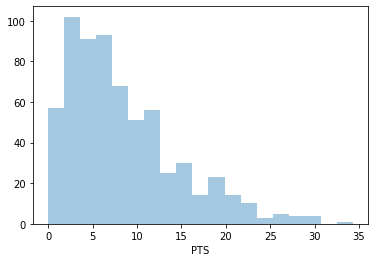

In [15]:
sns.distplot(df.PTS, 
             kde=False)

Change bar line color

<AxesSubplot:xlabel='PTS'>

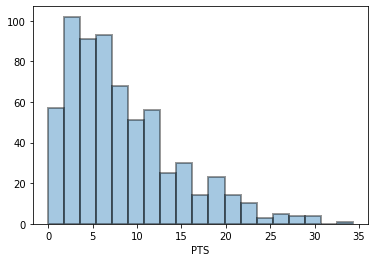

In [17]:
sns.distplot(df.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

<AxesSubplot:xlabel='PTS'>

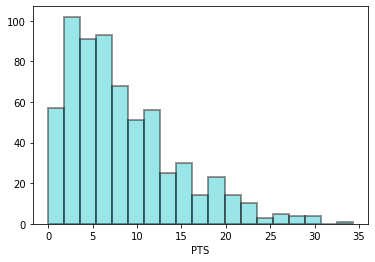

In [18]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')